  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.8025000000287796
        x: [ 1.120e+00  2.994e+02]
      nit: 4
      jac: [-4.455e-06  5.126e-06]
 hess_inv: [[ 9.060e-01 -1.604e-01]
            [-1.604e-01  1.218e+00]]
     nfev: 15
     njev: 5


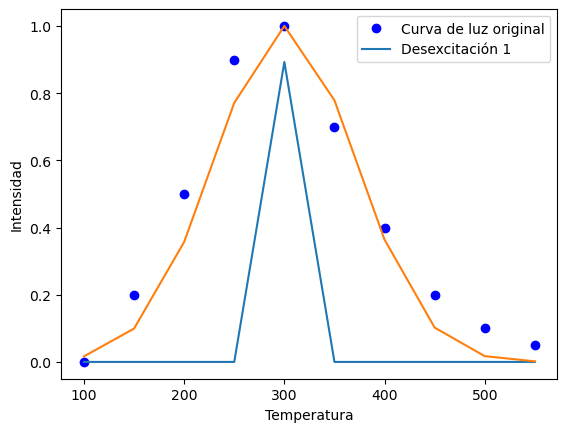

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

# Datos de ejemplo de la curva de luz termoluminiscente
temperaturas = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550], dtype=float)
intensidades = np.array([0, 0.2, 0.5, 0.9, 1.0, 0.7, 0.4, 0.2, 0.1, 0.05])

# Definir el número de picos o componentes esperados
num_picos = 1

# Definir las funciones objetivo para el ajuste
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

def objective(x):
    y = np.zeros_like(temperaturas)
    for i in range(num_picos):
        y += x[i] * gaussian(temperaturas - x[i + num_picos], x[i], 1.0)
    return np.sum((y - intensidades) ** 2)

# Inicializar los parámetros de las funciones de desexcitación y optimizarlos
initial_guess = np.array([1, 300])
result = minimize(objective, initial_guess)
print(result)
# Obtener los parámetros óptimos
params = result.x

# Crear las funciones de desexcitación ajustadas
desexcitaciones = []
for i in range(num_picos):
    desexcitaciones.append(gaussian(temperaturas - params[i + num_picos], params[i], 1.0))
    
# Graficar la curva de luz original y las desexcitaciones ajustadas
plt.plot(temperaturas, intensidades, 'bo', label='Curva de luz original')
for i in range(num_picos):
    plt.plot(temperaturas, desexcitaciones[i], label=f'Desexcitación {i+1}')
    plt.plot(temperaturas, gaussian(temperaturas-params[0+1], params[0],70))
plt.legend()
plt.xlabel('Temperatura')
plt.ylabel('Intensidad')
plt.show()
 

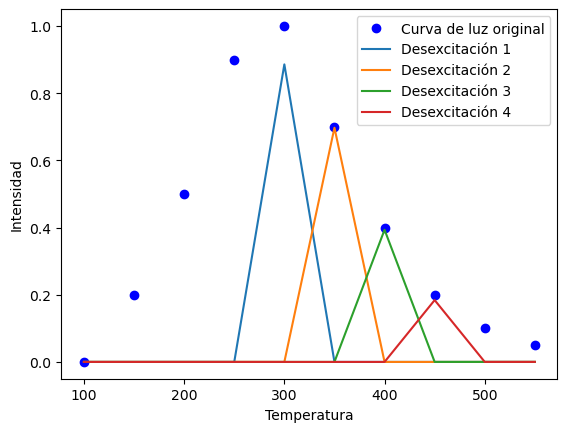

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

# Datos de ejemplo de la curva de luz termoluminiscente
temperaturas = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550], dtype=float)
intensidades = np.array([0, 0.2, 0.5, 0.9, 1.0, 0.7, 0.4, 0.2, 0.1, 0.05])

# Definir el número de picos o componentes esperados
num_picos = 4

# Definir las funciones objetivo para el ajuste
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

def objective(x):
    y = np.zeros_like(temperaturas)
    for i in range(num_picos):
        y += x[i] * gaussian(temperaturas - x[i + num_picos], x[i], 1.0)
    return np.sum((y - intensidades) ** 2)

# Inicializar los parámetros de las funciones de desexcitación y optimizarlos
initial_guess = np.concatenate((np.ones(num_picos), temperaturas[num_picos:]))
result = minimize(objective, initial_guess)

# Obtener los parámetros óptimos
params = result.x

# Crear las funciones de desexcitación ajustadas
desexcitaciones = []
for i in range(num_picos):
    desexcitaciones.append(gaussian(temperaturas - params[i + num_picos], params[i], 1.0))

# Graficar la curva de luz original y las desexcitaciones ajustadas
plt.plot(temperaturas, intensidades, 'bo', label='Curva de luz original')
for i in range(num_picos):
    plt.plot(temperaturas, desexcitaciones[i], label=f'Desexcitación {i+1}')
plt.legend()
plt.xlabel('Temperatura')
plt.ylabel('Intensidad')
plt.show()
